In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf

In [4]:
import datetime as dt
import yfinance as yf
import pandas as pd

# Define the time period and stock symbol
start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'HDFCBANK.NS'

# Download stock data
stk_data = yf.download(symbol, start=start, end=end)



[*********************100%***********************]  1 of 1 completed


In [7]:
# Selecting specific columns
stk_data = stk_data[["Open", "High", "Low", "Close"]]

In [8]:
stk_data 

Price,Open,High,Low,Close
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
Date,,,,
2021-07-01,1502.000000,1502.000000,1483.000000,1486.750000
2021-07-02,1485.000000,1489.250000,1477.000000,1480.400024
2021-07-05,1489.949951,1504.500000,1484.550049,1495.449951
2021-07-06,1497.000000,1540.000000,1496.000000,1534.699951
2021-07-07,1534.000000,1545.349976,1527.699951,1539.500000
...,...,...,...,...
2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951
2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000


In [9]:
 # Adjust to your column names
new_headers = ['Open','High','Low','Close'] 
stk_data.columns = new_headers

In [10]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,1502.000000,1502.000000,1483.000000,1486.750000
2021-07-02,1485.000000,1489.250000,1477.000000,1480.400024
2021-07-05,1489.949951,1504.500000,1484.550049,1495.449951
2021-07-06,1497.000000,1540.000000,1496.000000,1534.699951
2021-07-07,1534.000000,1545.349976,1527.699951,1539.500000
...,...,...,...,...
2022-01-19,1534.000000,1539.750000,1513.349976,1518.449951
2022-01-20,1528.449951,1528.500000,1500.099976,1509.000000
2022-01-21,1500.000000,1529.800049,1485.599976,1521.599976


In [11]:
stk_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2021-07-01 to 2022-01-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    143 non-null    float64
 1   High    143 non-null    float64
 2   Low     143 non-null    float64
 3   Close   143 non-null    float64
dtypes: float64(4)
memory usage: 5.6 KB


In [12]:
column="Close"

In [13]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (143, 1)


In [14]:
len(data1)

143

In [15]:
training_size = round(len(data1 ) * 0.95)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

136
X_train length: (136, 1)
X_test length: (7, 1)
y_train length: (136, 1)
y_test length: (7, 1)


In [16]:
"""from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(stk_data), len(stk_data)-1)
print(y_pred)
from stockFunctions import rmsemape
rmsemape(stkk,predicted_stock_price_test_oriP["Open"])"""

'from statsmodels.tsa.arima.model import ARIMA\nmodel = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)\nmodel_fit = model.fit()\n# make prediction\ny_pred= model_fit.predict(len(stk_data), len(stk_data)-1)\nprint(y_pred)\nfrom stockFunctions import rmsemape\nrmsemape(stkk,predicted_stock_price_test_oriP["Open"])'

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
orders=[(1,1,1),(1,1,2),(2,3,1),(2,2,2)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)

C:\Users\Dell\anaconda3\envs\tsa\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE-Testset: 0.06744681583849621
maPe-Testset: 2527044972409.8184
RMSE-Testset: 0.06880266774048384
maPe-Testset: 2696903126132.891
RMSE-Testset: 0.08542091725143443
maPe-Testset: 2267672147802.175
RMSE-Testset: 0.06988053519676028
maPe-Testset: 2236378240599.2583


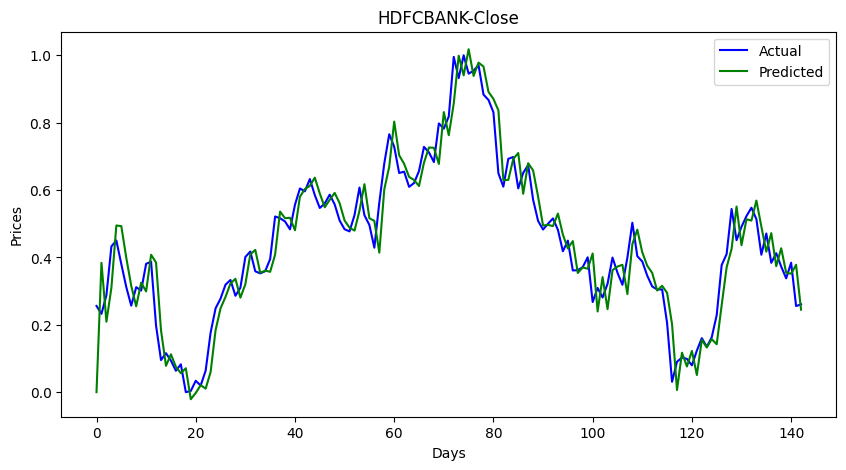

In [19]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","HDFCBANK-Close","Days","Prices")

In [20]:
len(data1)

143

In [21]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [22]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

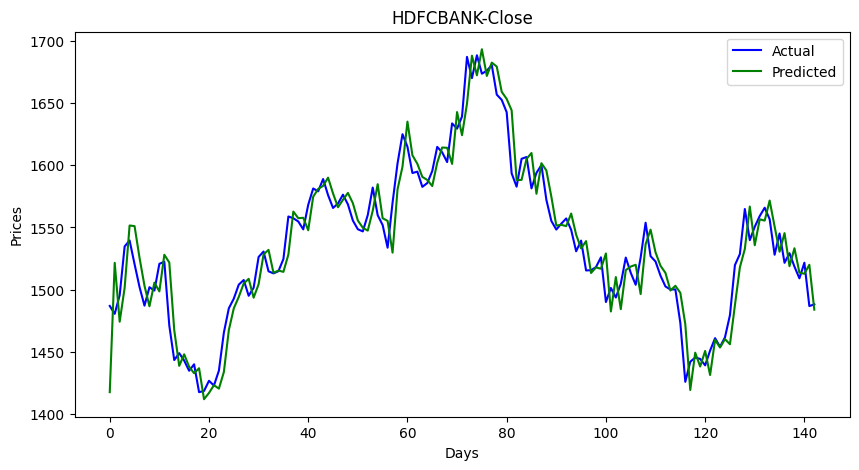

In [24]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","HDFCBANK-Close","Days","Prices")

In [25]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 18.96557042812974
maPe-Testset: 0.00963973388616957


In [26]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [27]:
forecast

array([0.27012156, 0.26225463, 0.26920499, 0.26327442])

In [28]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [29]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)